## Imports and Data Import



In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style
from sklearn.model_selection import train_test_split


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DS207/DS 207 Project/pca2.csv')
data.head()

,SERIALNO,SPORDER,WAGP,AGEP,COW,SCHL,SEX,WKHP,ESR,NAICSP,RAC1P,HISP,INDP,OCCP,SCIENGP,SCIENGRLP,RACE
0,2023000000009,1,3600,19,1,19,2,16,1,7220,8,2,8680,4055,3,3,0
1,2023000000028,1,800,23,1,19,1,15,1,7115,1,1,8564,2850,3,3,1
2,2023000000052,1,1800,23,1,20,1,15,1,7115,1,1,8564,2850,3,3,1
3,2023000000125,1,65000,28,1,19,1,40,6,4492,9,2,4796,4760,3,3,0
4,2023000000152,1,3000,20,1,19,2,20,6,61101,2,1,7870,4640,3,3,2


In [ ]:
# rename columns
data = data.rename(columns={"SERIALNO": "housing_unit", "SPORDER": "person_number", "WAGP":"wage", "AGEP":"age", "COW": "worker_class", "SCHL":"educational_attainment", "SEX": "sex", "WKHP":"num_hours_worked", "ESR":"employment_status", "NAICSP":"industry", "RAC1P":"race_nohispanic", "INDP":"industry_recode", "OCCP":"occupation_recode", "SCIENGP":"dsengin_indicator", "SCIENGRLP":"dsengin_related_indicator", "RACE":"race"}, errors="raise")

In [ ]:
# print the data with the new columns
data.head()

,housing_unit,person_number,wage,age,worker_class,educational_attainment,sex,num_hours_worked,employment_status,industry,race_nohispanic,HISP,industry_recode,occupation_recode,dsengin_indicator,dsengin_related_indicator,race
0,2023000000009,1,3600,19,1,19,2,16,1,7220,8,2,8680,4055,3,3,0
1,2023000000028,1,800,23,1,19,1,15,1,7115,1,1,8564,2850,3,3,1
2,2023000000052,1,1800,23,1,20,1,15,1,7115,1,1,8564,2850,3,3,1
3,2023000000125,1,65000,28,1,19,1,40,6,4492,9,2,4796,4760,3,3,0
4,2023000000152,1,3000,20,1,19,2,20,6,61101,2,1,7870,4640,3,3,2


## Checking Data Structure and Split Data into Training and Testing
We split the data into training and testing prior to the EDA to ensure that we are not peeking in to the testing set.

In [ ]:
# printing shape of data
print(f"The data has {data.shape[0]} rows and {data.shape[1]} columns.")

The data has 186375 rows and 17 columns.


In [ ]:
data.columns

Index(['housing_unit', 'person_number', 'wage', 'age', 'worker_class',
       'educational_attainment', 'sex', 'num_hours_worked',
       'employment_status', 'industry', 'race_nohispanic', 'HISP',
       'industry_recode', 'occupation_recode', 'dsengin_indicator',
       'dsengin_related_indicator', 'race'],
      dtype='object')

In [ ]:
# splitting data in X and Y
X = data[['housing_unit', 'person_number', 'age', 'worker_class',
       'educational_attainment', 'sex', 'num_hours_worked',
       'employment_status', 'industry', 'race_nohispanic', 'industry_recode',
       'occupation_recode', 'dsengin_indicator', 'dsengin_related_indicator','race']]
Y = data['wage']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1234)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 1234)

## Running Exploratory Data Analysis

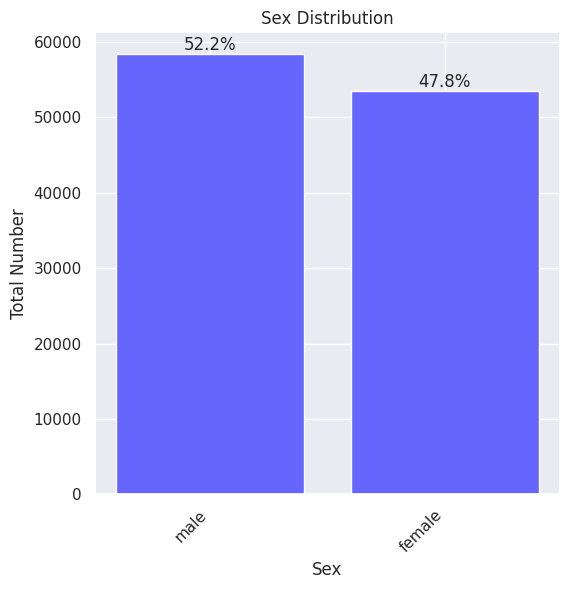

The training data has 52.20% of men and 47.80% of women.


In [ ]:
# checking the number of male and female rows
sex = pd.DataFrame(X_train["sex"].value_counts()).reset_index()
label_mapping_sex = {1:"male", 2:'female'}

fig, axs = plt.subplots(1, 1, figsize = (6,6))

# create bar plot
axs.bar(["{:.0f}".format(x) for x in sex["sex"]], sex['count'], color = "#6666FF")
for i in range(len(sex["sex"])):
    plt.text(i, sex['count'][i], f"{str(round(sex['count'][i]/(sum(sex['count']))*100,2))}%", ha='center', va='bottom')

# set titles
axs.set_title("Sex Distribution")
axs.set_xlabel("Sex")
axs.set_ylabel("Total Number")
# adjust x axis labeling
new_labels = [label_mapping_sex[label] for label in sex["sex"]]
axs.set_xticks(np.arange(len(sex["sex"])))
axs.set_xticklabels(new_labels, rotation=45, ha='right')


plt.show()

print(f"The training data has {(sex['count'][0]/(sex['count'][0]+(sex['count'][1])))*100:0.2f}% of men and {(sex['count'][1]/(sex['count'][0]+(sex['count'][1])))*100:0.2f}% of women.")

# the data is relatively evenly split between males and females

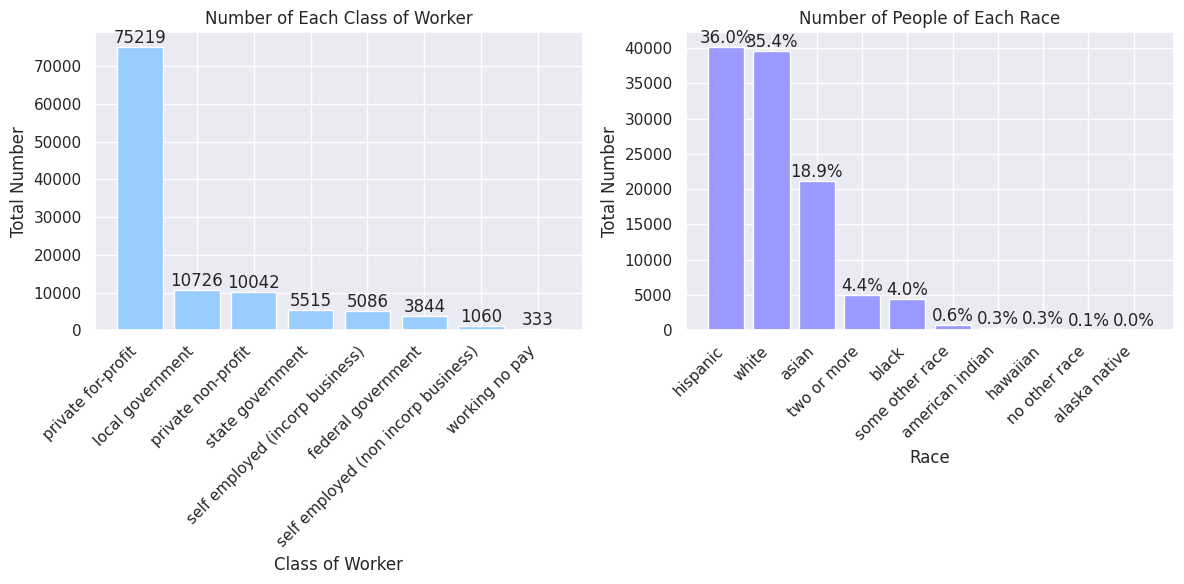

In [ ]:
# checking the number of worker class rows and checking the number of people in each race

# create dataframes and label mapping
cow = pd.DataFrame(X_train["worker_class"].value_counts()).reset_index()
race = pd.DataFrame(X_train["race"].value_counts()).reset_index()
label_mapping_cow = {1: 'private for-profit', 2: 'private non-profit', 3: 'local government', 4: 'state government', 5:'federal government', 6:'self employed (non incorp business)', 7:'self employed (incorp business)', 8:"working no pay", 9:"unemployed"}
label_mapping_race = {0:"hispanic",1:"white", 2:'black',3:"american indian", 4:'alaska native', 5:'no other race', 6:'asian', 7:'hawaiian', 8:'some other race', 9:'two or more'}

fig, axs = plt.subplots(1, 2, figsize = (12,6))

# create bar plot
axs[0].bar(["{:.0f}".format(x) for x in cow["worker_class"]], cow['count'], color = "#99CCFF")
for i in range(len(cow["worker_class"])):
    axs[0].text(i, cow['count'][i], str(cow['count'][i]), ha='center', va='bottom')
# set titles
axs[0].set_title("Number of Each Class of Worker")
axs[0].set_xlabel("Class of Worker")
axs[0].set_ylabel("Total Number")
# adjust x axis labeling
new_labels = [label_mapping_cow[label] for label in cow["worker_class"]]
axs[0].set_xticks(np.arange(len(cow["worker_class"])))
axs[0].set_xticklabels(new_labels, rotation=45, ha='right')

# create bar plot
axs[1].bar(["{:.0f}".format(x) for x in race["race"]], race['count'], color = "#9999FF")
race_perc_list = []
for i in race['count']:
  i = f"{round(i/sum(race['count'])*100,1)}%"
  race_perc_list.append(i)

for i in range(len(race["race"])):
    axs[1].text(i, race['count'][i], race_perc_list[i], ha='center', va='bottom')
# set titles
axs[1].set_title("Number of People of Each Race")
axs[1].set_xlabel("Race")
axs[1].set_ylabel("Total Number")
# adjust x axis labeling
new_labels = [label_mapping_race[label] for label in race["race"]]
axs[1].set_xticks(np.arange(len(race["race"])))
axs[1].set_xticklabels(new_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()


# majority of the dataset are working for private for profit businesses
# majority of the dataset are white people. there are few data points on black people, american indians, alaskan indians, and hawaiians.

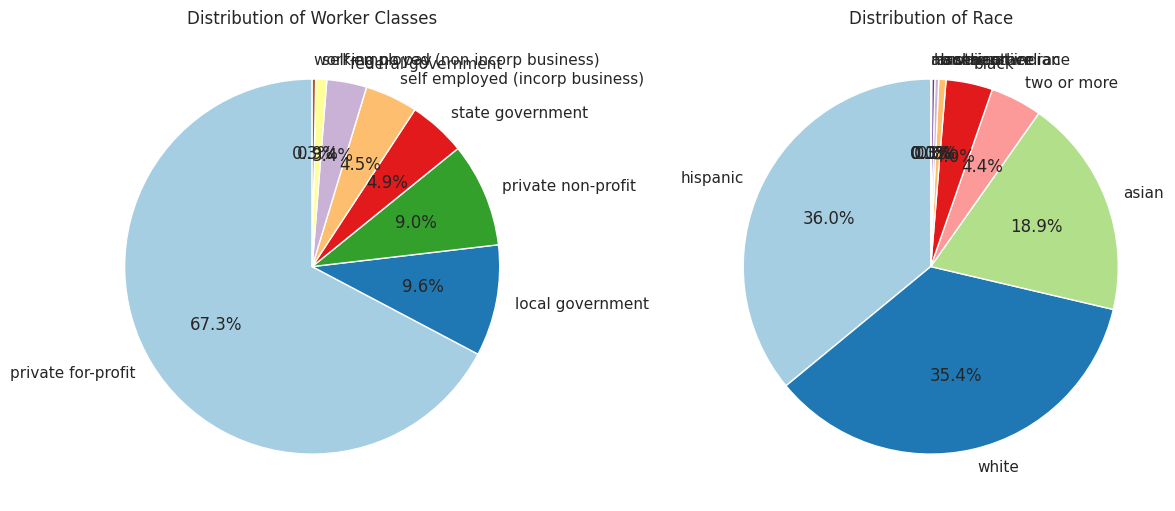

In [ ]:
# making pie charts to represent the race

# Create explicit DataFrames for the counts.
cow = pd.DataFrame({
    'worker_class': X_train["worker_class"].value_counts().index,
    'count': X_train["worker_class"].value_counts().values
})
race = pd.DataFrame({
    'race': X_train["race"].value_counts().index,
    'count': X_train["race"].value_counts().values
})

# Label mappings provided
label_mapping_cow = {
    1: 'private for-profit',
    2: 'private non-profit',
    3: 'local government',
    4: 'state government',
    5: 'federal government',
    6: 'self employed (non incorp business)',
    7: 'self employed (incorp business)',
    8: "working no pay",
    9: "unemployed"
}
label_mapping_race = {
    0: "hispanic",
    1: "white",
    2: "black",
    3: "american indian",
    4: "alaska native",
    5: "no other race",
    6: "asian",
    7: "hawaiian",
    8: "some other race",
    9: "two or more"
}

# Create labels for the pie charts using the mapping dictionaries.
labels_cow = [label_mapping_cow.get(label, str(label)) for label in cow["worker_class"]]
labels_race = [label_mapping_race.get(label, str(label)) for label in race["race"]]

# Create the figure with 2 subplots side-by-side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Worker class pie chart
axs[0].pie(cow['count'],
           labels=labels_cow,
           autopct='%1.1f%%',
           startangle=90,
           colors=plt.cm.Paired(np.linspace(0, 1, len(cow))))
axs[0].set_title("Distribution of Worker Classes")

# Race pie chart
axs[1].pie(race['count'],
           labels=labels_race,
           autopct='%1.1f%%',
           startangle=90,
           colors=plt.cm.Paired(np.linspace(0, 1, len(race))))
axs[1].set_title("Distribution of Race")

plt.tight_layout()
plt.show()



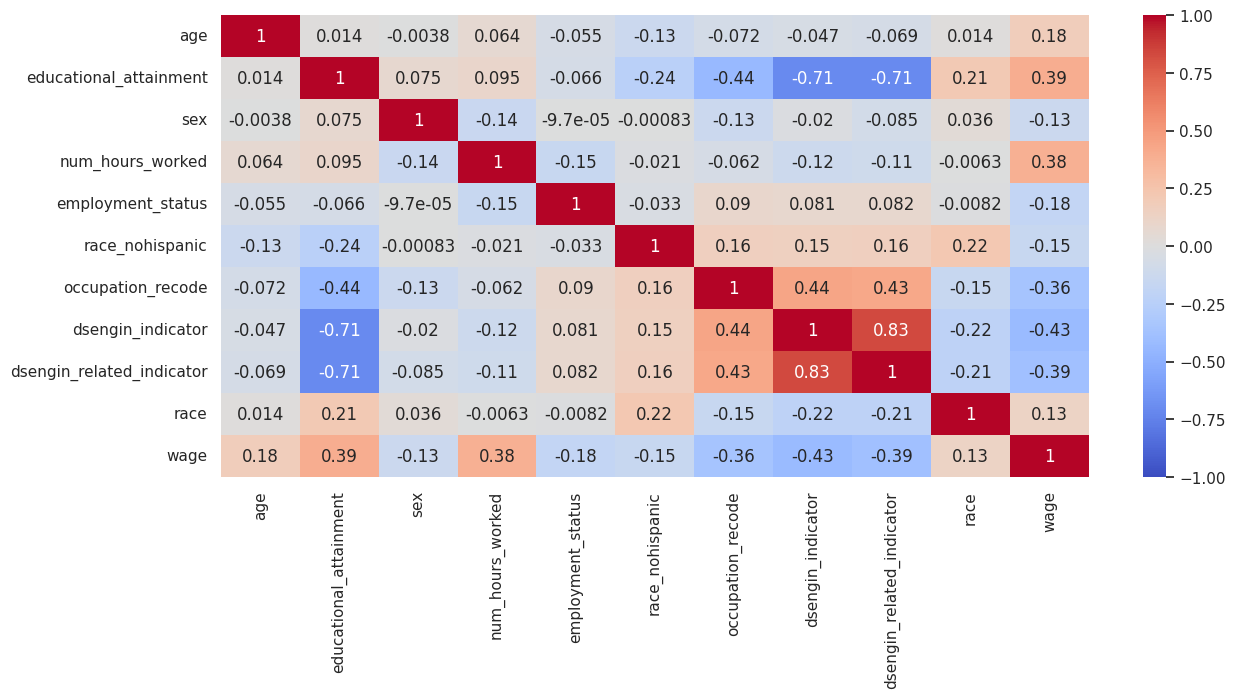

In [ ]:
# printing correlation matrix
corr = pd.concat([X_train.drop(columns = ['housing_unit', 'person_number','worker_class', 'industry','industry_recode']), Y_train], axis = 1).corr()
plt.figure(figsize=(14, 6))
sns.heatmap(corr, annot = True, cmap='coolwarm',vmin=-1, vmax=1)
plt.show()

In [ ]:
# grouping occupation
def assign_occupation(occupation_recode):
    if 18 <= occupation_recode <440:
        return "Manager"
    elif 500 <= occupation_recode < 751:
        return "Business Operations"
    elif 800 <= occupation_recode < 961:
        return "Financial Analyst"
    elif 1005 <= occupation_recode < 1241:
        return "Computer Programmer"
    elif 1305 <= occupation_recode < 1561:
        return "Engineer"
    elif 1600 <= occupation_recode < 1981:
        return "Scientist"
    elif 2000 <= occupation_recode < 2061:
        return "CMS"
    elif 2100 <= occupation_recode < 2181:
        return "Judicial Worker"
    elif 2205 <= occupation_recode < 2556:
        return "Teacher"
    elif 2600 <= occupation_recode < 2921:
        return "Artist/Writer/Athlete"
    elif 3000 <= occupation_recode < 3551:
        return "Doctors"
    elif 3601 <= occupation_recode < 3656:
        return "Healthcare Assistant"
    elif 3700 <= occupation_recode < 3961:
        return "Police"
    elif 4000 <= occupation_recode < 4161:
        return "Food Preparers"
    elif 4200 <= occupation_recode < 4256:
        return "Janitors"
    elif 4330 <= occupation_recode < 4656:
        return "Personal Care and Service Workers"
    elif 4700 <= occupation_recode < 4966:
        return "Sales Workers"
    elif 5000 <= occupation_recode < 5941:
        return "Office Administratives"
    elif 6005 <= occupation_recode < 6130:
        return "Agricultural Workers"
    elif 6200 <= occupation_recode < 6766:
        return "Construction Workers"
    elif 6800 <= occupation_recode < 6951:
        return "Extraction Workers"
    elif 7000 <= occupation_recode < 7641:
        return "Installation and Repair Workers"
    elif 7700 <= occupation_recode < 8991:
        return "Production Workers"
    elif 9005 <= occupation_recode < 9760:
        return "Material Moving Workers"
    elif 9800 <= occupation_recode < 9831:
        return "Military Workers"
    elif occupation_recode == 9920:
        return "Unemployed"
    else:
        return "Unemployed"

In [ ]:
X_train['occupation_binned'] = X_train['occupation_recode'].apply(assign_occupation)

<ipython-input-45-30342fd9343c>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels([label_mapping_education.get(label, label) for label in sorted(X_train['educational_attainment'].unique())], rotation=45, ha='right')
<ipython-input-45-30342fd9343c>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(labels = X_train['occupation_binned'], rotation=45, ha='right')


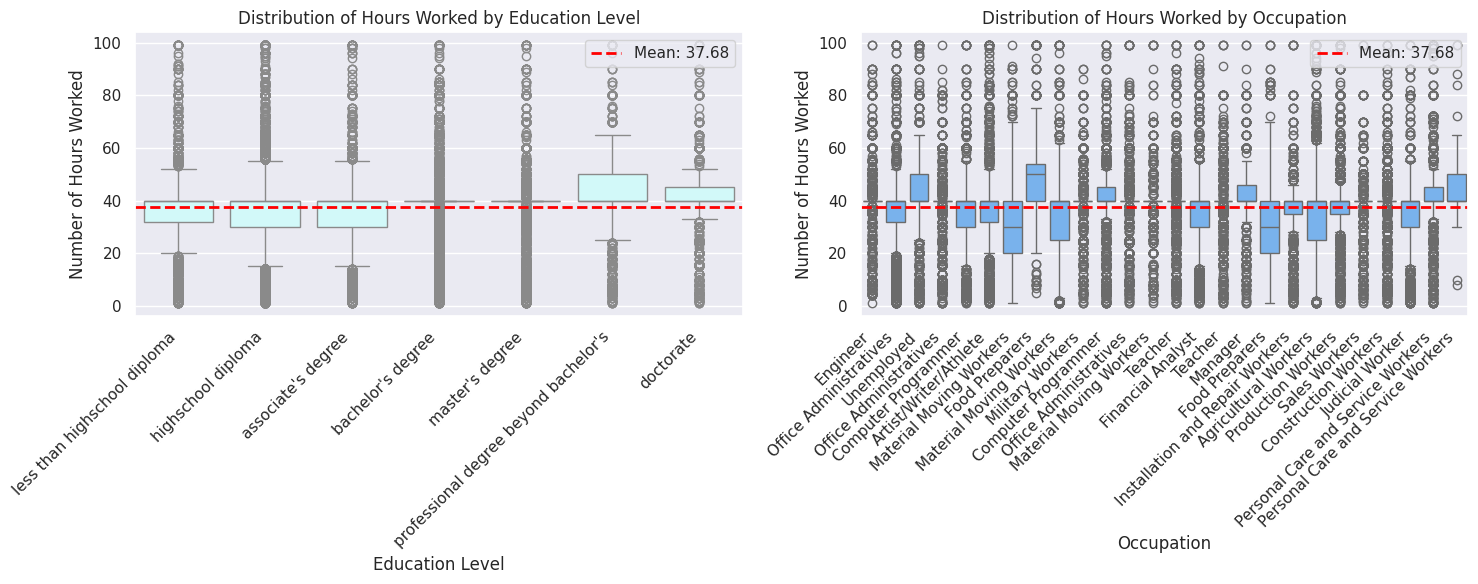

In [ ]:
# making box plots of number of hours worked by education and occupation

label_mapping_education = {15:"less than highschool diploma", 19:'highschool diploma',20:"associate's degree", 21:"bachelor's degree", 22:"master's degree", 23:"professional degree beyond bachelor's", 24:'doctorate'}

fig, axs = plt.subplots(1, 2, figsize = (15,6))
mean_num_hours_worked = X_train['num_hours_worked'].mean()
axs[0] = sns.boxplot(x = 'educational_attainment', y = 'num_hours_worked', data = X_train, ax = axs[0], color="#CCFFFF")
axs[0].set_title("Distribution of Hours Worked by Education Level")
axs[0].set_xlabel("Education Level")
axs[0].set_ylabel("Number of Hours Worked")
axs[0].axhline(mean_num_hours_worked, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_num_hours_worked:.2f}')
axs[0].set_xticklabels([label_mapping_education.get(label, label) for label in sorted(X_train['educational_attainment'].unique())], rotation=45, ha='right')

axs[1] = sns.boxplot(x = 'occupation_binned', y = 'num_hours_worked', data = X_train, ax = axs[1], color="#66B2FF")
axs[1].set_xticklabels(labels = X_train['occupation_binned'], rotation=45, ha='right')
axs[1].set_title("Distribution of Hours Worked by Occupation")
axs[1].set_xlabel("Occupation")
axs[1].set_ylabel("Number of Hours Worked")
axs[1].axhline(mean_num_hours_worked, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_num_hours_worked:.2f}')

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")

plt.tight_layout()
plt.show()

<ipython-input-46-9eb3c5ac4107>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels([label_mapping_education.get(label, label) for label in sorted(X_train['educational_attainment'].unique())], rotation=45, ha='right')
<ipython-input-46-9eb3c5ac4107>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(labels = X_train['occupation_binned'], rotation=45, ha='right')


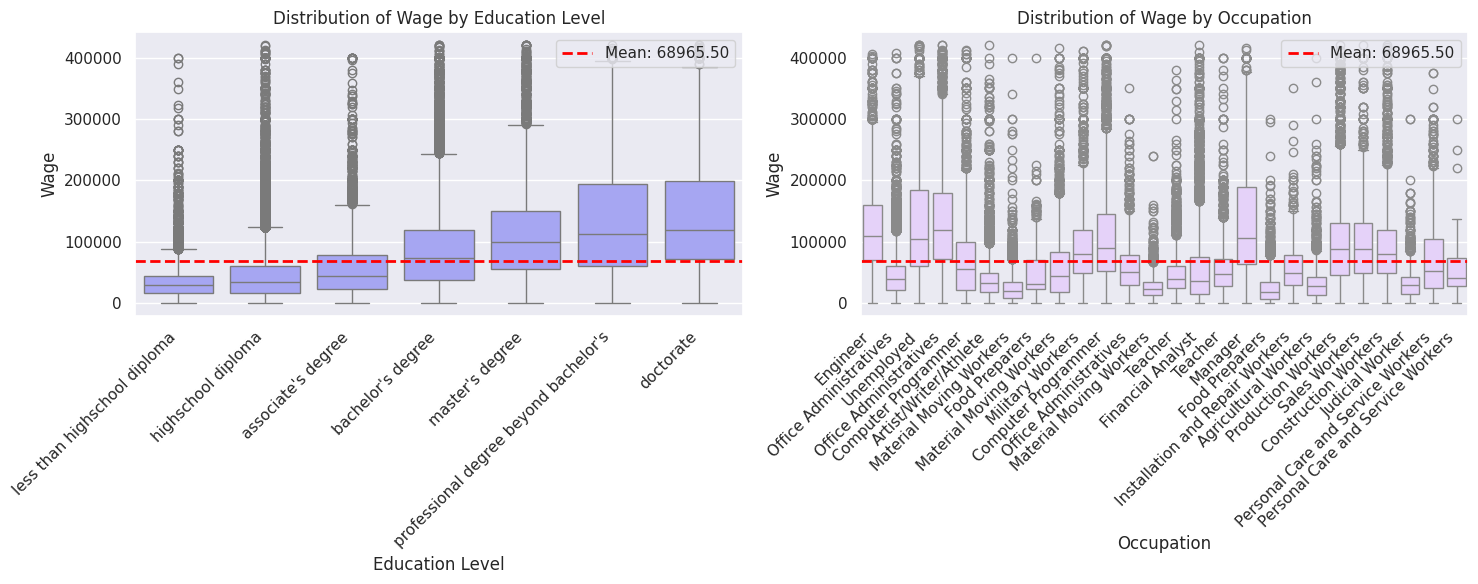

In [ ]:
# making box plots of wage worked by education and occupation

fig, axs = plt.subplots(1, 2, figsize = (15,6))
data_plot = pd.concat([X_train,Y_train], axis = 1)
mean_wage = data_plot['wage'].mean()

axs[0] = sns.boxplot(x = 'educational_attainment', y = 'wage', data = data_plot, ax = axs[0], color="#9999FF")
axs[0].set_title("Distribution of Wage by Education Level")
axs[0].set_xlabel("Education Level")
axs[0].set_ylabel("Wage")
axs[0].axhline(mean_wage, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_wage:.2f}')
axs[0].set_xticklabels([label_mapping_education.get(label, label) for label in sorted(X_train['educational_attainment'].unique())], rotation=45, ha='right')

axs[1] = sns.boxplot(x = 'occupation_binned', y = 'wage', data = data_plot, ax = axs[1], color="#E5CCFF")
axs[1].set_title("Distribution of Wage by Occupation")
axs[1].set_xlabel("Occupation")
axs[1].set_ylabel("Wage")
axs[1].axhline(mean_wage, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_wage:.2f}')
axs[1].set_xticklabels(labels = X_train['occupation_binned'], rotation=45, ha='right')

axs[0].legend(loc="upper right")
axs[1].legend(loc="upper right")

plt.tight_layout()
plt.show()

<ipython-input-47-19bf88a49393>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs.set_xticklabels([label_mapping_sex.get(label, label) for label in sorted(X_train['sex'].unique())], rotation=45, ha='right')


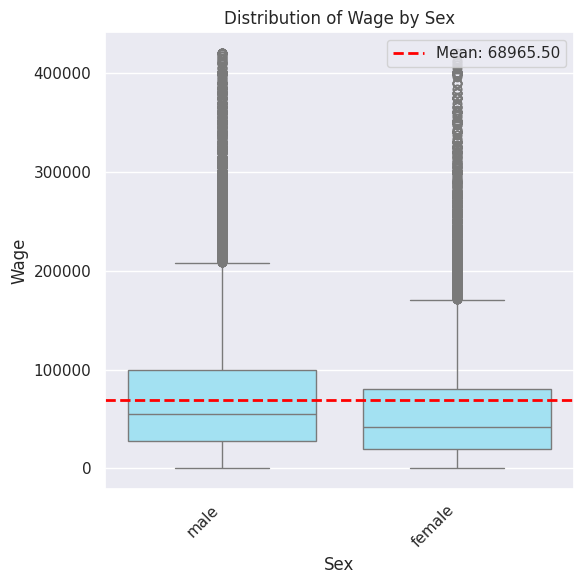

In [ ]:
# making box plots of wage worked by education and occupation

fig, axs = plt.subplots(1, 1, figsize = (6,6))
mean_wage = data_plot['wage'].mean()

axs = sns.boxplot(x = 'sex', y = 'wage', data = data_plot, color="#96E9FF")
axs.set_title("Distribution of Wage by Sex")
axs.set_xlabel("Sex")
axs.set_ylabel("Wage")
axs.axhline(mean_wage, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_wage:.2f}')
axs.set_xticklabels([label_mapping_sex.get(label, label) for label in sorted(X_train['sex'].unique())], rotation=45, ha='right')
axs.legend(loc="upper right")

plt.tight_layout()
plt.show()

<ipython-input-48-31fc4f3038bb>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


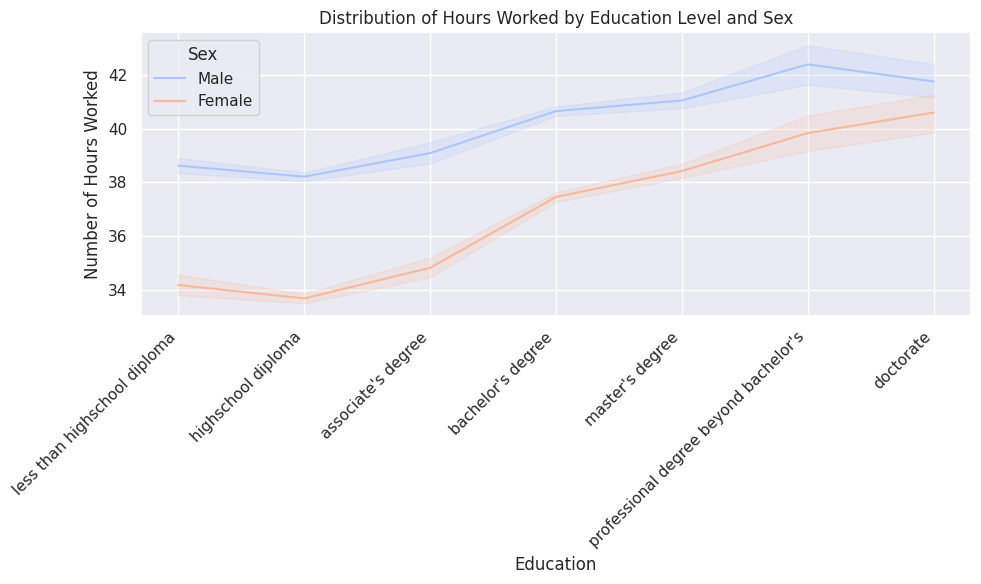

In [ ]:
data_plot = pd.concat([X_train,Y_train], axis = 1)

data_plot["educational_attainment"] = data_plot['educational_attainment'].map(label_mapping_education)
education_order = label_mapping_education.values()
data_plot["educational_attainment"] = pd.Categorical(data_plot["educational_attainment"], ordered=True, categories=education_order)
data_plot["sex"] = data_plot["sex"].replace({1: "Male", 2: "Female"})


plt.figure(figsize=(10,6))

ax = sns.lineplot(x="educational_attainment", y="num_hours_worked", hue="sex", data=data_plot, palette="coolwarm")

plt.xlabel("Education")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.ylabel("Number of Hours Worked")
plt.title("Distribution of Hours Worked by Education Level and Sex")
plt.legend(title="Sex")

plt.tight_layout()
plt.show()

<ipython-input-49-d61087cbe164>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


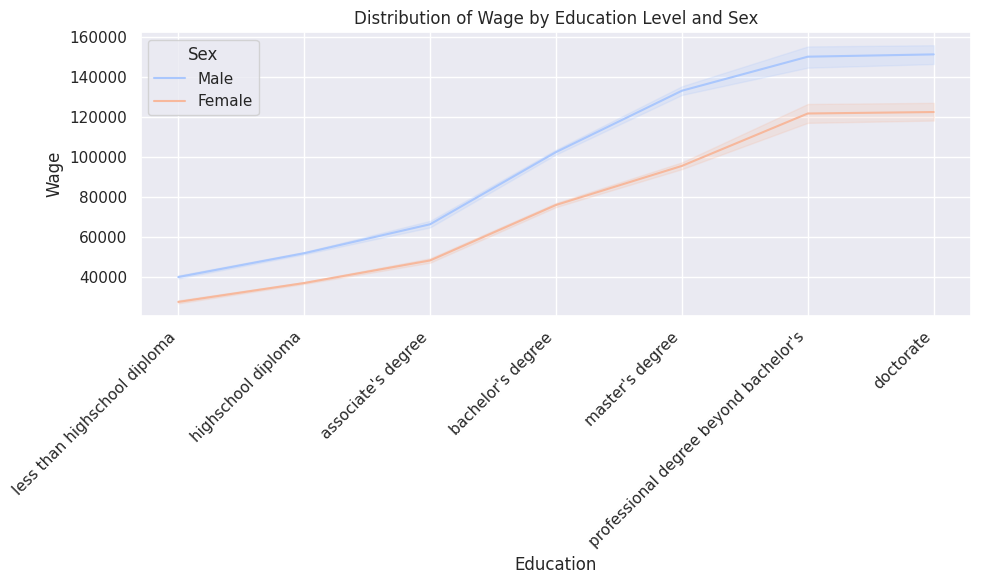

In [ ]:
data_plot = pd.concat([X_train,Y_train], axis = 1)

data_plot["educational_attainment"] = data_plot['educational_attainment'].map(label_mapping_education)
education_order = label_mapping_education.values()
data_plot["educational_attainment"] = pd.Categorical(data_plot["educational_attainment"], ordered=True, categories=education_order)
data_plot["sex"] = data_plot["sex"].replace({1: "Male", 2: "Female"})


plt.figure(figsize=(10,6))

ax = sns.lineplot(x="educational_attainment", y="wage", hue="sex", data=data_plot, palette="coolwarm")

plt.xlabel("Education")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.ylabel("Wage")
plt.title("Distribution of Wage by Education Level and Sex")
plt.legend(title="Sex")

plt.tight_layout()
plt.show()

<ipython-input-50-8d5dca34fd7c>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


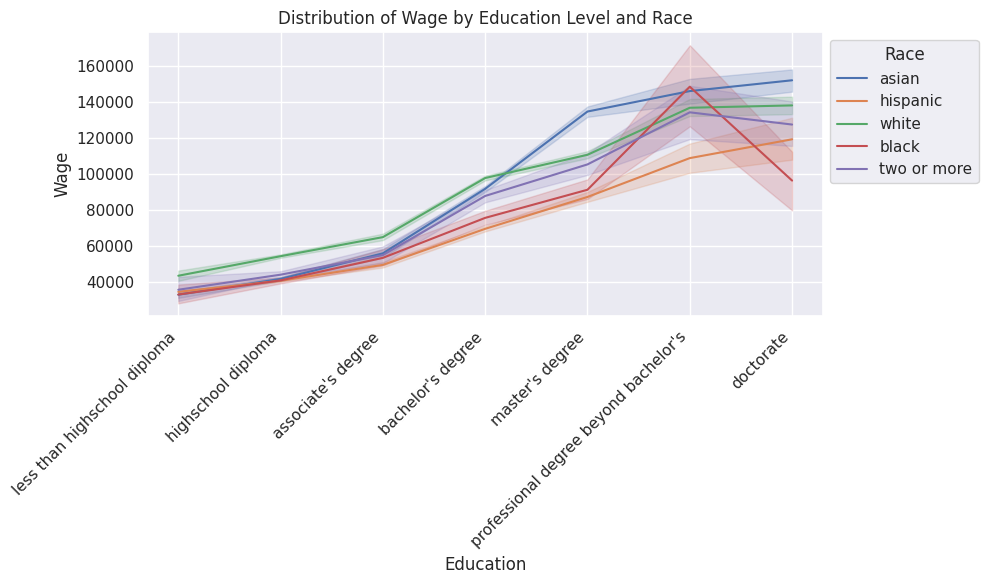

In [ ]:
data_plot = pd.concat([X_train,Y_train], axis = 1)

data_plot["educational_attainment"] = data_plot['educational_attainment'].map(label_mapping_education)
education_order = label_mapping_education.values()
data_plot["educational_attainment"] = pd.Categorical(data_plot["educational_attainment"], ordered=True, categories=education_order)
data_plot["race"] = data_plot["race"].replace(label_mapping_race)
data_plot = data_plot[data_plot["race"].isin(["asian", "hispanic","white","two or more", "black"])]


plt.figure(figsize=(10,6))

ax = sns.lineplot(x="educational_attainment", y="wage", hue="race", data=data_plot)

plt.xlabel("Education")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.ylabel("Wage")
plt.title("Distribution of Wage by Education Level and Race")
plt.legend(title="Race", loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

<Figure size 2000x600 with 0 Axes>

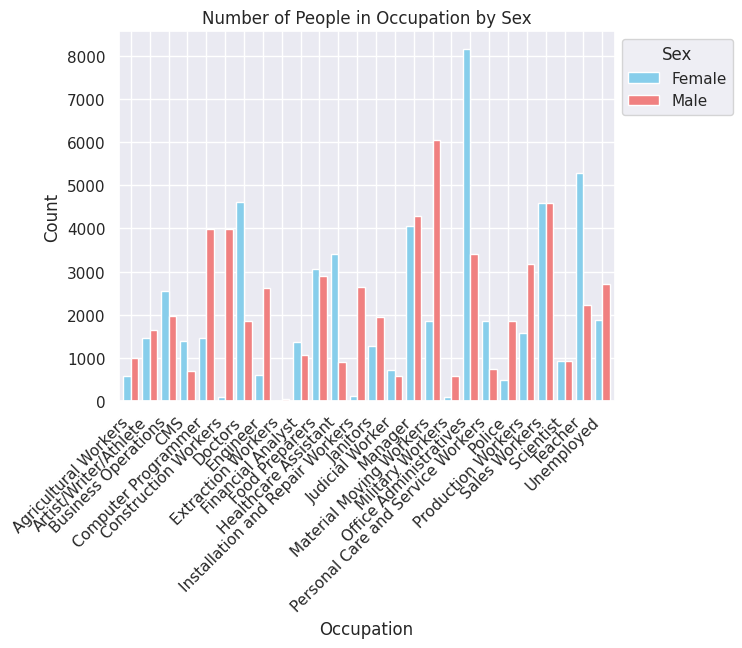

In [ ]:
data_plot = pd.concat([X_train,Y_train], axis = 1)
data_plot["sex"] = data_plot["sex"].replace({1: "Male", 2: "Female"})
grouped_counts = data_plot.groupby(['occupation_binned', 'sex']).size().unstack(fill_value=0)

plt.figure(figsize=(20,6))
grouped_counts.plot(kind='bar', width=0.8, color=['skyblue', 'lightcoral'])  # You can customize colors

plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Number of People in Occupation by Sex')
plt.xticks(rotation=45, ha = 'right')
plt.legend(title="Sex", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()
